# **Objetivo del notebook**

Haremos un análisis de los datos de youtoxic_english.csv, para entrenar un modelo de machine learning que detecte comentarios de odio en vídeos de youtube para así poder eliminarlos, banear al usuario o lo que sea necesario.


# **Contenido del Notebook**

1. Importanción de librerías y dataset

2. Comprensión básica de los datos

3. Análisis exploratorio de datos (EDA)

4. Ingeniería de características

5. Preprocesamiento de datos

6. Elaboración de modelos

7. Comprobación del rendimiento del modelo

8. Ajuste de hiperparámetros del modelo

9. Predicción de datos de prueba utilizando el mejor modelo

10. Conclusiones

## **1. Importamos librerías y dataset**

In [ ]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 10.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Data analysis libraries
import numpy as np
import pandas as pd
import math
from scipy import stats
from tabulate import tabulate

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
# read csv file
path = "/work/youtoxic_english_1000.csv"
df = pd.read_csv(path)

## **2. Comprensión básica de los datos**

2.1 Descripción de los datos

2.2 Valores únicos de cada columna

2.3 Comprobación de las dimensiones de los datos

2.4 Visualización del conjunto de datos

2.5 Comprobación de tipos de datos

▫️ Categóricos

▫️ Numéricos

▫️ Tipos de datos mixtos

▫️ Errores o erratas

2.6 Comprobación de datos duplicados

2.7 Comprobación del número total y el porcentaje de valores omitidos

2.8 Comprobación de la cardinalidad de las características categóricas

### **2.1. Descripción de los datos**

In [ ]:
# first 4 rows
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgiZMAhCt-R4rXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [ ]:
# show info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


### **2.2. Valores únicos de cada columna**

In [ ]:
# Obtener los valores únicos de las columnas que los pueden tener
cols_con_unicos = [
    'IsToxic',
    'IsAbusive',
    'IsThreat',
    'IsProvocative',
    'IsObscene',
    'IsHatespeech',
    'IsRacist',
    'IsNationalist',
    'IsSexist',
    'IsHomophobic',
    'IsReligiousHate',
    'IsRadicalism'

]

vals_unicos = {}
for col in cols_con_unicos:
    valores = df[col].unique()
    vals_unicos[col] = valores

# Convertir el diccionario en una lista de listas para tabulate
tabla_datos = []
for col, valores in vals_unicos.items():
    tabla_datos.append([col, ', '.join(map(str, valores))])

# Imprimir la tabla
print(tabulate(tabla_datos, headers=["Columna", "Valores Únicos"], tablefmt="grid"))

+-----------------+------------------+
| Columna         | Valores Únicos   |
+=================+==================+
| IsToxic         | False, True      |
+-----------------+------------------+
| IsAbusive       | False, True      |
+-----------------+------------------+
| IsThreat        | False, True      |
+-----------------+------------------+
| IsProvocative   | False, True      |
+-----------------+------------------+
| IsObscene       | False, True      |
+-----------------+------------------+
| IsHatespeech    | False, True      |
+-----------------+------------------+
| IsRacist        | False, True      |
+-----------------+------------------+
| IsNationalist   | False, True      |
+-----------------+------------------+
| IsSexist        | False, True      |
+-----------------+------------------+
| IsHomophobic    | False            |
+-----------------+------------------+
| IsReligiousHate | False, True      |
+-----------------+------------------+
| IsRadicalism    | False

### **2.3. Comprobación de las dimensiones de los datos**

In [ ]:
# Number of rows and columns in dataset
df.shape

(1000, 15)

### **2.4. Visualización del conjunto de datos**

In [ ]:
# View first elements of the dataset
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


### **2.5. Comprobación de tipos de datos**
>

In [ ]:
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [ ]:


data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
boolean_columns = data_types[data_types == 'bool'].index.tolist()

print("1. Columnas Categóricas:", ", ".join(categorical_columns))
print()
print("2. Columnas Booleanas:", ", ".join(boolean_columns))


1. Columnas Categóricas: CommentId, VideoId, Text

2. Columnas Booleanas: IsToxic, IsAbusive, IsThreat, IsProvocative, IsObscene, IsHatespeech, IsRacist, IsNationalist, IsSexist, IsHomophobic, IsReligiousHate, IsRadicalism



### **2.6. Comprobación de datos duplicados**

In [ ]:
# check duplicated
df.duplicated().sum()

0

### **2.7. Comprobación de valores nulos**

In [ ]:
# count null values
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

### **2.8. Comprobación de la cardinalidad de las características categóricas**

In [ ]:
# check the cardinality of each column
print("Column Cardinality:")
print()
print(df.select_dtypes(include=["bool", "object"]).nunique())

Column Cardinality:

CommentId          1000
VideoId              13
Text                997
IsToxic               2
IsAbusive             2
IsThreat              2
IsProvocative         2
IsObscene             2
IsHatespeech          2
IsRacist              2
IsNationalist         2
IsSexist              2
IsHomophobic          1
IsReligiousHate       2
IsRadicalism          1
dtype: int64


##  **3. Análisis exploratorio de datos (EDA)**

In [ ]:
patron = r'[^a-zA-Z0-9\s]'

filtler_cha = df[df["Text"].str.contains(patron, na=False, regex=True)]

filtler_cha

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,UghGyVemEvDEqXgCoAEC,XRuCW80L9mA,"Whites should move-out of Ferguson, let's see ...",True,False,False,False,False,True,True,False,False,False,False,False
994,UghHMimNd9cYxngCoAEC,XRuCW80L9mA,I just found this channel and its one of my fa...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False


#### **Vemos qué tokens se repiten más, antes de limpiar el texto**

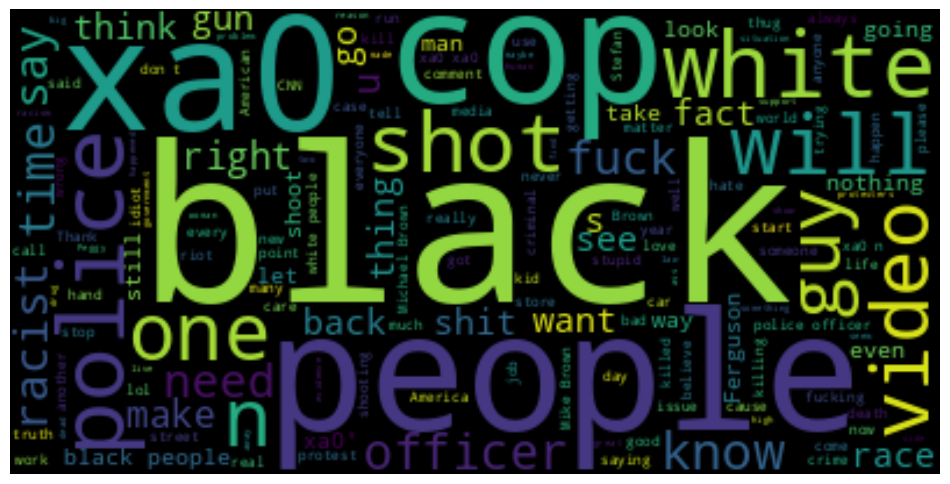

In [ ]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="black").generate(str(text))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **Miramos qué palabras predominan en cada columna**

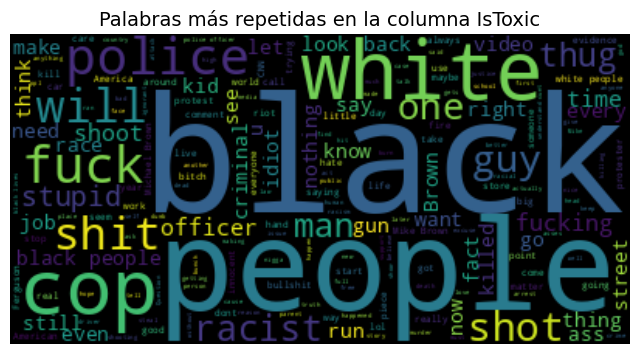

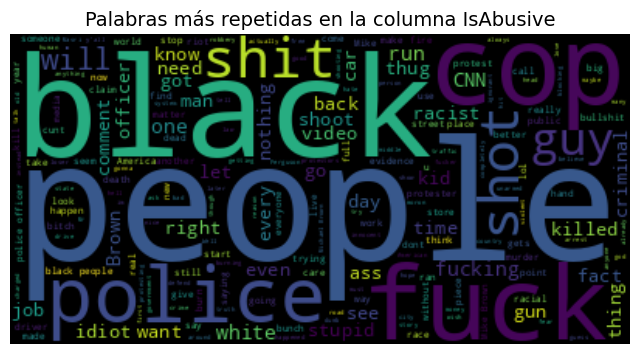

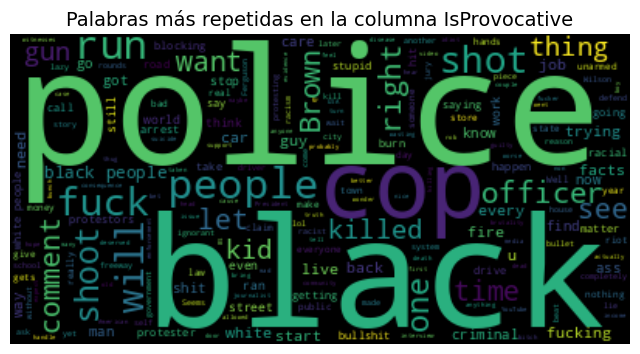

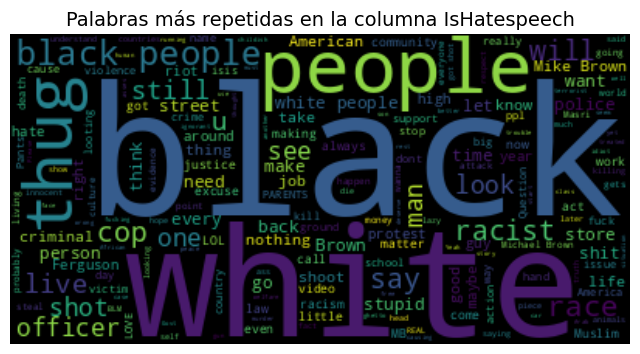

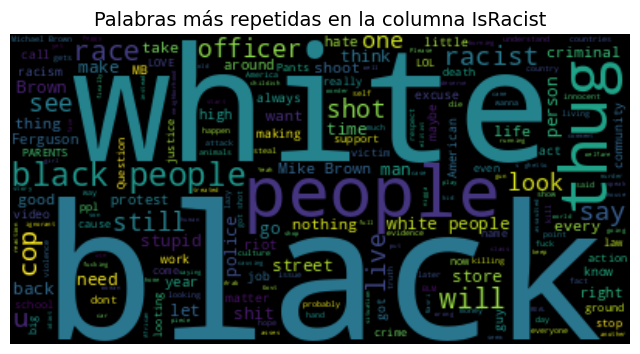

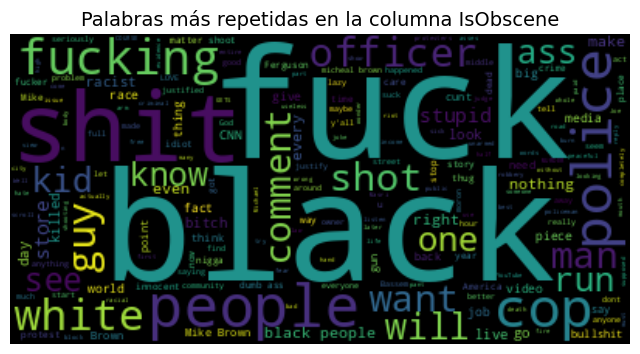

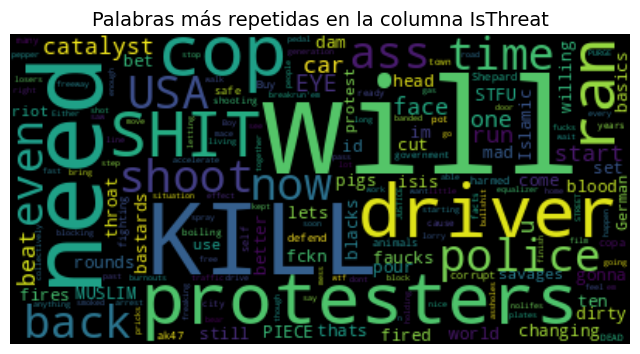

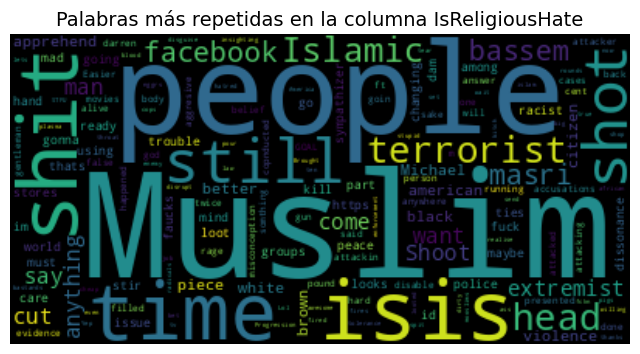

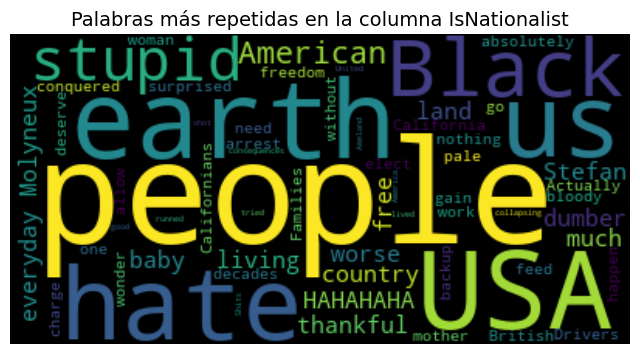

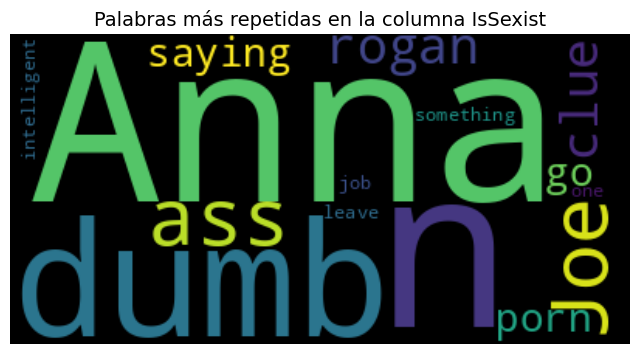

In [ ]:
# Crear una función para generar nubes de palabras para cada columna
def generate_wordcloud_for_column(column_name):
    text = " ".join(df[df[column_name] == True]['Text'].values)
    wordcloud = WordCloud(background_color="black").generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Palabras más repetidas en la columna {column_name}", fontsize=14)
    plt.axis("off")
    plt.show()

# Generar nubes de palabras para cada columna relevante
relevant_columns = [
    'IsToxic', 'IsAbusive', 'IsProvocative', 'IsHatespeech',
    'IsRacist', 'IsObscene', 'IsThreat', 'IsReligiousHate',
    'IsNationalist', 'IsSexist'
]

for column in relevant_columns:
    generate_wordcloud_for_column(column)

#### **Graficamos el porcentaje de True y False de cada característica para ver cuál está más balanceada**

In [ ]:
# Sacamos el porcentaje de true y false de cada característica
def porcentajes(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

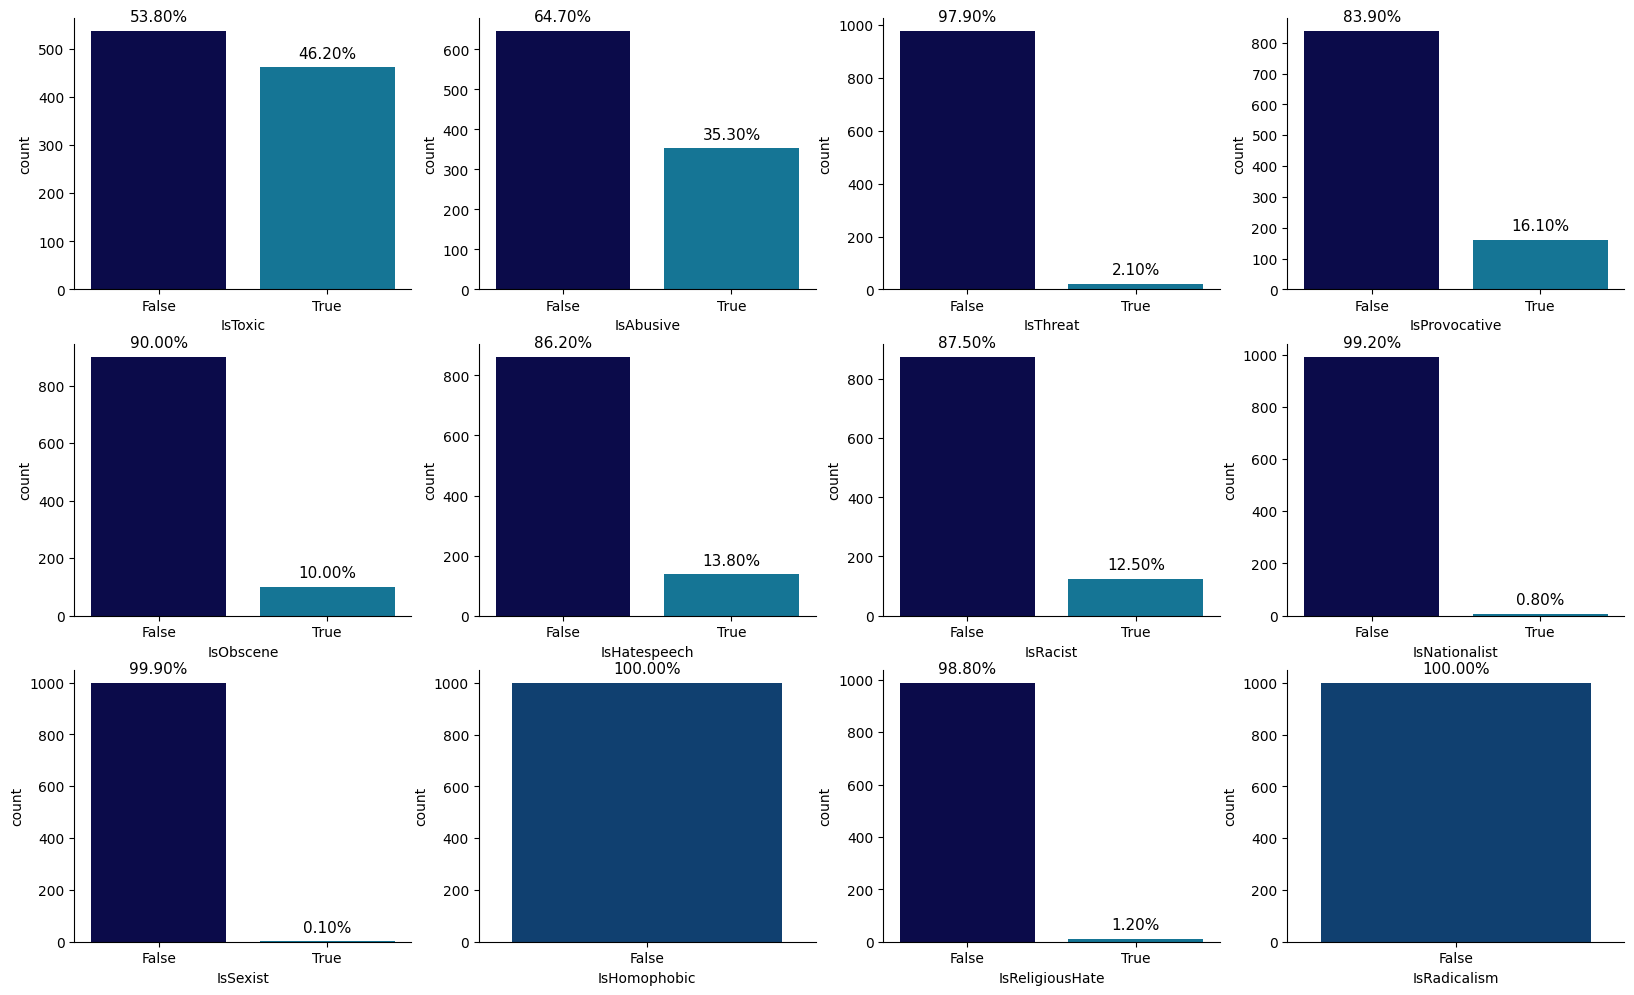

In [ ]:
# Graficamos el porcentaje de true y false de cada característica booleana

variables_booleanas=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,12))
for i,item in enumerate(variables_booleanas): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="ocean")
    plt.xlabel(str(item))
    i=i+1
    porcentajes(ax)
plt.show()

In [ ]:
# Recuento de True y False de cada característica
print(f"Recuento de True y False de cada característica:")
print()
for col in variables_booleanas:
    print(f"{col}")
    print(df[col].value_counts())
    print()


Recuento de True y False de cada característica:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



In [ ]:
# Graficamos el recuento de True - False
columns_names = df.columns.tolist()
bar_data = {}
for name in columns_names[1:]:
    bar_data[name] = len(df.loc[df[name] == 1]) / len(df[name])
    
bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (25, 12))

plt.bar(bar_name, values, color = colors,
        width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100}%") 
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()

NameError: name 'colors' is not defined

<Figure size 2500x1200 with 0 Axes>

#### **La columna más balanceada es 'IsToxic' con 538 False y 462 True**

Una primera aproximación a la hora de entrenar el modelo podría ser usar 'IsToxic' como variable objetivo.

<AxesSubplot: xlabel='IsToxic', ylabel='count'>

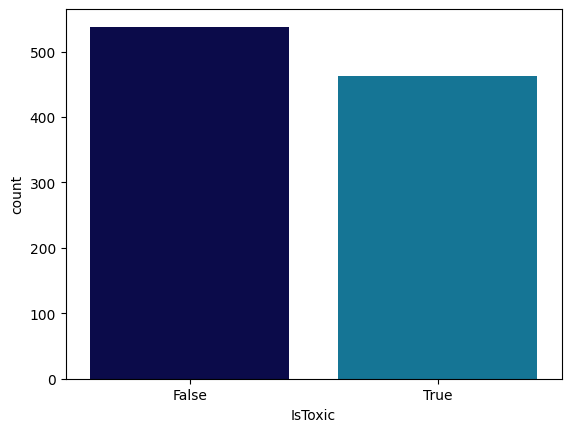

In [ ]:
sns.countplot(x ='IsToxic', data = df, palette="ocean")

#### **Sacamos la correlación entre las variables**

Relación lineal entre la columna "IsToxic" y las demas columnas, se basa en la covarianza entre ellas.

In [ ]:
# La funcion corr() de pandas, obtenemos la correlacion entre las columnas
corr_matrix = df.corr()
corr_matrix["IsToxic"].sort_values(ascending = False)

IsToxic            1.000000
IsAbusive          0.797086
IsProvocative      0.472718
IsHatespeech       0.431774
IsRacist           0.407869
IsObscene          0.359707
IsThreat           0.158048
IsReligiousHate    0.118928
IsNationalist      0.096908
IsSexist           0.034142
IsHomophobic            NaN
IsRadicalism            NaN
Name: IsToxic, dtype: float64

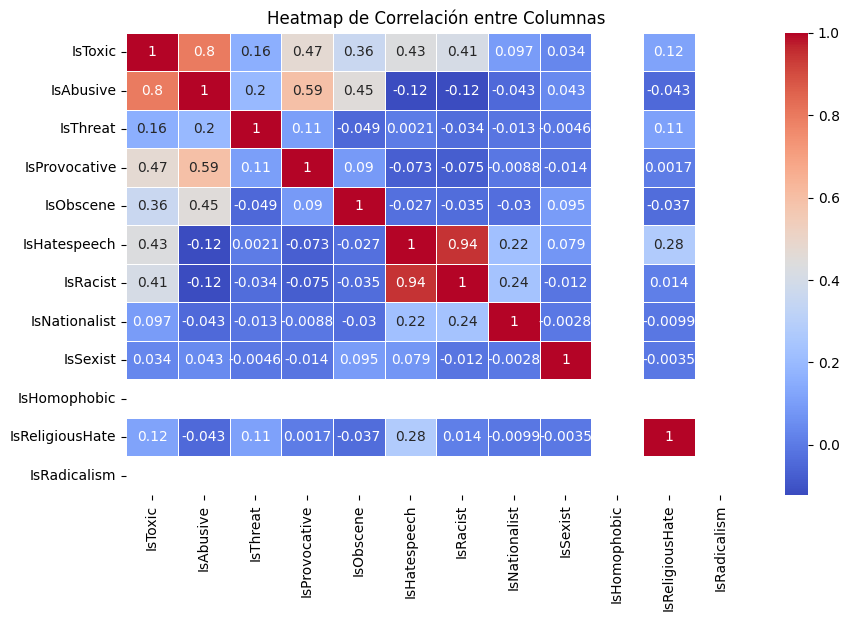

In [ ]:
# Creamos el heatmap
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

#### **Miramos qué vídeos tienen más comentarios**

In [ ]:
# Número de comentarios por Vídeo en función de su ID
df.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
XRuCW80L9mA     10
dDbRyFIkNII     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

Text(0, 0.5, 'Número de comentarios')

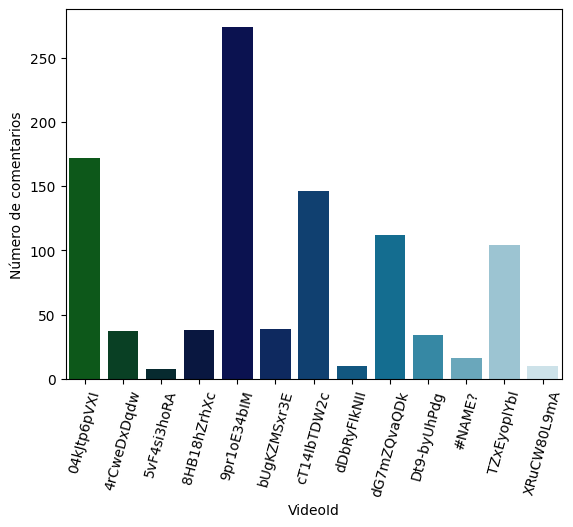

In [ ]:
ax = sns.countplot(x="VideoId",data=df, palette="ocean")
plt.xticks(rotation=75)
plt.ylabel("Número de comentarios")


#### **Comprobamos qué tipo de comentarios de odio abundan más en el vídeo con más values True**

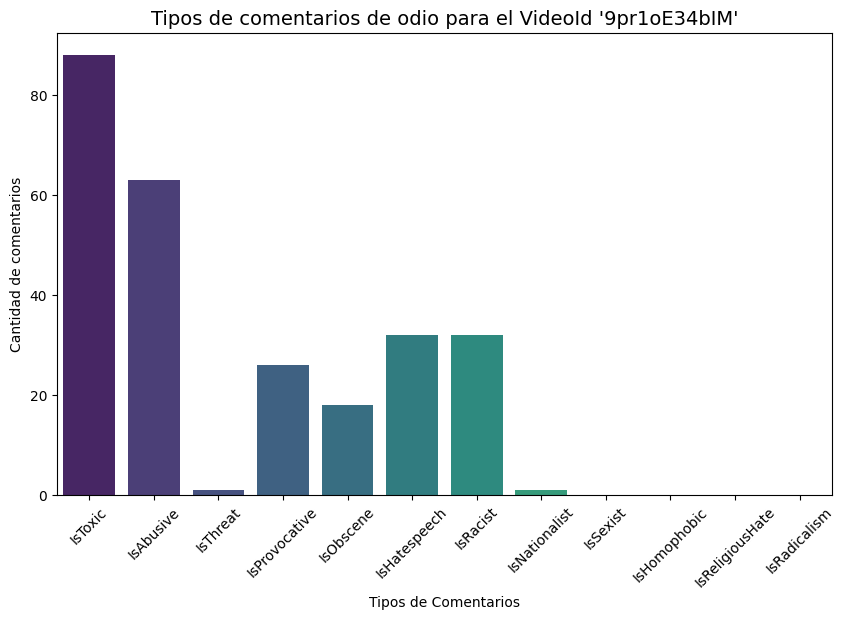

In [ ]:
# Filtrar el DataFrame para el vídeo con el VideoId "9pr1oE34bIM"
video_data = df[df['VideoId'] == '9pr1oE34bIM']

# Contar la cantidad de True en cada columna para ese vídeo
counts = video_data.iloc[:, 3:].sum()

# Crear la gráfica de barras para mostrar la cantidad de comentarios de odio para ese video en las diferentes categorías
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title("Tipos de comentarios de odio para el VideoId '9pr1oE34bIM'", fontsize=14)
plt.xlabel("Tipos de Comentarios")
plt.ylabel("Cantidad de comentarios")
plt.xticks(rotation=45)
plt.show()

**Observaciones:**
De nuevo, los comentarios que más abundan son los de categoría 'IsToxic', y si miramos categorías más específicas, la más abundante sería 'IsRacist'.

 Sin embargo, también es relevante destacar que la segunda columna con mayor presencia es 'IsAbusive'. Esto sugiere que el contenido del video analizado puede estar relacionado con situaciones de abuso de autoridad u otros temas que generan comentarios abusivos.


Como conclusión, la variable 'IsToxic' no sólo es la más balanceada, sino que está presente en vídeos de diferentes tipos, así que puede ser buena idea usarla como variable objetivo. 

Además, la alta frecuencia de 'IsAbusive' sugiere que el video podría estar relacionado con casos de abuso de autoridad o situaciones controvertidas que generan comentarios de naturaleza abusiva. Esto proporciona información valiosa para comprender mejor el contexto de los comentarios en el video.

## **4. Ingeniería de características**

Inicialmente vamos a usar 'IsToxic' como variable objetivo.
En una siguiente vuelta de Scrum queremos probar a crear una nueva columna a partir de los 'True' de las ya existentes, y usarla como variable objetivo.

##  **5. Preprocesamiento de datos**

Como estamos trabajando con textos y vamos entrenar un modelo de NLP, el preprocesamiento de los datos en este caso consistirá en distintos pasos de limpieza del texto para dejarlo listo para el modelo.

5.1. Eliminar columnas innecesarias
5.2. Regex: Limpieza y filtrado de texto
5.3. Stopwords: Eliminación de palabras vacías
5.3. Tokenización: Divide los comentarios en palabras o tokens.
5.4. Lematización: Normalización de las palabras
5.5. Vectorizar: ^_^ 
5.6. Codificación: Convertir Bool to int
5.7.  --- 



### **5.1. Eliminar columnas innecesarias**

### **5.2. Regex: Limpieza y filtrado de texto**

### **5.3. Stopwords: Eliminación de palabras vacías**

### **5.4. Tokenización: Divide los comentarios en palabras o tokens**

### **5.5. Lematización: Normalización de las palabras**

### **5.6. Vectorizar**

### **5.7. Codificación: Convertir Bool to int**

##  **6. Elaboración de modelos**

##  **7. Comprobación del rendimiento del modelo**

##  **8. Ajuste de hiperparámetros del modelo**

##  **9. Predicción de datos de prueba utilizando el mejor modelo**

##  **10. Conclusiones**

##

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22be43cf-6e58-4d4e-8694-3183dc7644ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>